In [1]:
# d'après le challenge Kaggle : https://www.kaggle.com/c/titanic

# Decision Tree : Entropie

In [1]:
import numpy as np # import la librairie numpy (calcul scientifique)
import matplotlib.pyplot as plt # librairie pour afficher les graphs.
%matplotlib inline  
import pandas as pd #for manipulating data 

In [2]:
# Charge les donnees utile pour le TP
def get_titanic_data():
     
    np.random.seed(42)
    # get titanic & test csv files as a DataFrame
    titanic_df = pd.read_csv("train_titanic.csv", dtype={"Age": np.float64}, )

    # drop unnecessary columns, these columns won't be useful in analysis and prediction
    titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch' , 'Fare', 'Cabin'], axis=1)


    # only in titanic_df, fill the two missing values with the most occurred value, which is "S".
    titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

    # Age: values are missing, we replace them
    # get average, std, and number of NaN values in titanic_df
    average_age_titanic   = titanic_df["Age"].mean()
    std_age_titanic       = titanic_df["Age"].std()
    count_nan_age_titanic = titanic_df["Age"].isnull().sum()
    # generate random numbers between (mean - std) & (mean + std)
    rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
    titanic_df['Age'].dropna().astype(int)
    # fill NaN values in Age column with random values generated   
    titanic_df["Age"] = titanic_df["Age"].fillna(30)
    # convert from float to int
    titanic_df['Age'] = titanic_df['Age'].astype(int)
    
    # y nous dit qui a survécu
    y = titanic_df['Survived']
    # X contient les données utiles pour la classification
    X = titanic_df.drop( ["Survived"], axis = 1)
    print("X: données:")
    print(X.head())
   
    return X,y

In [33]:
X, y = get_titanic_data()
"""
On accede aux données en utilisant les noms des features comme des attributs de X:
X.Pclass, X.Sex, X.age, X.Embarked ou de manière équivalente X["Pclass"], X["Sex"], etc...
On peut les transformer en listes ou vecteurs:
"""
print("\n")
print(np.array(X["Age"])[:5])
print(np.array(X["Sex"])[:5])
print(np.array(y)[:5])
"""
On peut aussi s'en servir pour extraire facilement des données:
"""
print(np.array((X['Age'] == 38)&(X['Sex'] == 'female'))[:5]) 
print(np.array((X['Age'] < 30)&(y == 1))[:5]) 

X data :
 
   Pclass     Sex  Age Embarked
0       3    male   22        S
1       1  female   38        C
2       3  female   26        S
3       1  female   35        S
4       3    male   35        S


 y label : 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


### Probabilité de survivre en sachant le genre, le port d'embarquement ou la classe du billet :

In [58]:
from __future__ import division

Attributes = ['Pclass', 'Embarked', 'Sex']
for Att in Attributes:
    print("\n")
    for att in set(X[Att]):
        nb_att = np.sum(X[Att] == att)
        nb_att_survived = np.sum((X[Att] == att) & (y == 1))
        condi_prob_att_survived = nb_att_survived / nb_att
        print("Conditional probability P(Survivre| %s = %s) = %.2f" % (Att, att, condi_prob_att_survived))
        
Attribute = 'Age'
print("\n")
for i in range(8):
    nb_att = np.sum((X[Attribute] > i*10) & (X[Attribute] < (i+1)*10))
    nb_att_survived = np.sum((X[Attribute] > i*10) & (X[Attribute] < (i+1)*10) & (y == 1))
    condi_prob_att_survived = nb_att_survived / nb_att
    print("Conditional probability P(Survivre| %i < %s < %i ) = %.2f" % (i*10, Attribute, (i+1)*10, condi_prob_att_survived))



Conditional probability P(Survivre| Pclass = 1) = 0.63
Conditional probability P(Survivre| Pclass = 2) = 0.47
Conditional probability P(Survivre| Pclass = 3) = 0.24


Conditional probability P(Survivre| Embarked = Q) = 0.39
Conditional probability P(Survivre| Embarked = S) = 0.34
Conditional probability P(Survivre| Embarked = C) = 0.55


Conditional probability P(Survivre| Sex = male) = 0.19
Conditional probability P(Survivre| Sex = female) = 0.74


Conditional probability P(Survivre| 0 < Age < 10 ) = 0.56
Conditional probability P(Survivre| 10 < Age < 20 ) = 0.41
Conditional probability P(Survivre| 20 < Age < 30 ) = 0.36
Conditional probability P(Survivre| 30 < Age < 40 ) = 0.45
Conditional probability P(Survivre| 40 < Age < 50 ) = 0.38
Conditional probability P(Survivre| 50 < Age < 60 ) = 0.39
Conditional probability P(Survivre| 60 < Age < 70 ) = 0.27
Conditional probability P(Survivre| 70 < Age < 80 ) = 0.00


### Entropie: 

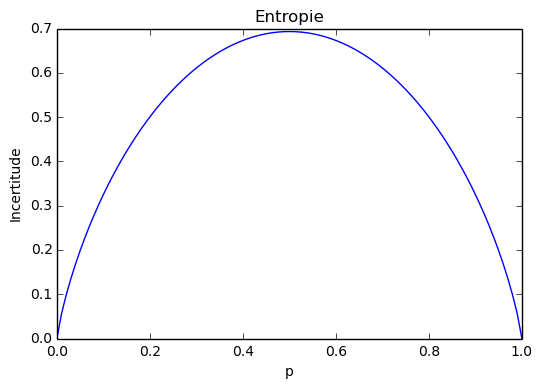

In [47]:
"""
I = -p * log(p) - (1-p) * log(1- p)
avec p = Proba(survivre | genre = femme) 
Rappel : un faible I est plus informatif qu'un I élevé
"""

def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return - p*np.log(p) - (1-p)*np.log(1-p)
    
list_p = np.arange(0.00,1.01,0.01)
plt.plot(list_p, [entropy(p) for p in list_p])

plt.title('Entropie')
plt.xlabel('p')
plt.ylabel('Incertitude')

In [70]:
p_survie = np.sum(y==1) / len(X)

Attributes = ['Pclass', 'Embarked', 'Sex']
for Att in Attributes:
    print("\n")
    probs = []
    for att in set(X[Att]):
        nb_att = np.sum(X[Att] == att)
        nb_att_survived = np.sum((X[Att] == att) & (y == 1))
        condi_prob_att_survived = nb_att_survived / nb_att
        prob_classe = nb_att / len(X[Att])
        probs.append((condi_prob_att_survived, prob_classe))
        print("Entropie de (%s = %s) = %.2f" % (Att, att, entropy(condi_prob_att_survived)))
    print("\n")
    print("Entropie de (%s) = %.2f" % (Att, sum([j*entropy(i) for (i, j) in probs])))
    print("Gain d'information de (%s) = %.2f" % (Att, entropy(p_survie) - sum([j*entropy(i) for (i, j) in probs])))
    
Attribute = 'Age'
print("\n")
probs = []
for i in range(8):
    nb_att = np.sum((X[Attribute] > i*10) & (X[Attribute] < (i+1)*10))
    nb_att_survived = np.sum((X[Attribute] > i*10) & (X[Attribute] < (i+1)*10) & (y == 1))
    condi_prob_att_survived = nb_att_survived / nb_att
    prob_classe = nb_att / len(X[Attribute])
    probs.append((condi_prob_att_survived, prob_classe))
    print("Entropie de (%i < %s < %i) = %.2f" % (i*10, Attribute, (i+1)*10, entropy(condi_prob_att_survived)))
print("\n")
print("Entropie de (%s) = %.2f" % (Attribute, sum([j*entropy(i) for (i, j) in probs])))
print("Gain d'information de (%s) = %.2f" % (Attribute, entropy(p_survie) - sum([j*entropy(i) for (i, j) in probs])))


"""Mecaniquement, le gain d'information sera plus eleve si la feature peut prendre un grand nombre de valeurs differentes.
Ces gains seront cependant moins susceptibles de se generaliser: ici, on gagnera plus d'information si l'on choisit des
classes d'ages plus inclusives, mais cela ne nous aidera pas lors d'un test."""



Entropie de (Pclass = 1) = 0.66
Entropie de (Pclass = 2) = 0.69
Entropie de (Pclass = 3) = 0.55


Entropie de (Pclass) = 0.61
Gain d'information de (Pclass) = 0.06


Entropie de (Embarked = Q) = 0.67
Entropie de (Embarked = S) = 0.64
Entropie de (Embarked = C) = 0.69


Entropie de (Embarked) = 0.65
Gain d'information de (Embarked) = 0.01


Entropie de (Sex = male) = 0.48
Entropie de (Sex = female) = 0.57


Entropie de (Sex) = 0.52
Gain d'information de (Sex) = 0.15


Entropie de (0 < Age < 10) = 0.69
Entropie de (10 < Age < 20) = 0.68
Entropie de (20 < Age < 30) = 0.65
Entropie de (30 < Age < 40) = 0.69
Entropie de (40 < Age < 50) = 0.66
Entropie de (50 < Age < 60) = 0.67
Entropie de (60 < Age < 70) = 0.58
Entropie de (70 < Age < 80) = 0.00


Entropie de (Age) = 0.47
Gain d'information de (Age) = 0.20


"Mecaniquement, le gain d'information sera plus eleve si la feature peut prendre un grand nombre de valeurs differentes.\nCes gains seront cependant moins susceptibles de se generaliser: ici, on gagnera plus d'information si l'on choisit des\nclasses d'ages plus inclusives, mais cela ne nous aidera pas lors d'un test."

In [82]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
print np.array(X["Age"]).shape
print np.array([i=='male' for i in list(X["Sex"])]).shape
print np.array(X["Pclass"]).shape
X_array = np.stack([np.array(X["Age"]),np.array([i=='male' for i in list(X["Sex"])]),np.array(X["Pclass"])], 1)
print X_array.shape
DT.fit(X_array,y)

print DT.feature_importances_

(891,)
(891,)
(891,)
(891, 3)
[ 0.3612132   0.45716048  0.18162632]
